In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

hprices_df = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()
hprices_df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


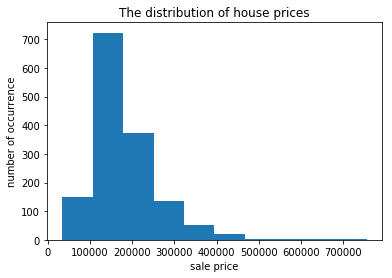

In [3]:
plt.hist(hprices_df['saleprice'])
plt.title("The distribution of house prices")
plt.xlabel("sale price")
plt.ylabel("number of occurrence")
plt.show()

In [4]:
#look at number of variables and categories per variable
print("num col: " + str(len(hprices_df.columns)))
for column in hprices_df.columns:
    print(column + ": " + str(len(hprices_df[column].unique())))

num col: 81
id: 1460
mssubclass: 15
mszoning: 5
lotfrontage: 111
lotarea: 1073
street: 2
alley: 3
lotshape: 4
landcontour: 4
utilities: 2
lotconfig: 5
landslope: 3
neighborhood: 25
condition1: 9
condition2: 8
bldgtype: 5
housestyle: 8
overallqual: 10
overallcond: 9
yearbuilt: 112
yearremodadd: 61
roofstyle: 6
roofmatl: 8
exterior1st: 15
exterior2nd: 16
masvnrtype: 5
masvnrarea: 328
exterqual: 4
extercond: 5
foundation: 6
bsmtqual: 5
bsmtcond: 5
bsmtexposure: 5
bsmtfintype1: 7
bsmtfinsf1: 637
bsmtfintype2: 7
bsmtfinsf2: 144
bsmtunfsf: 780
totalbsmtsf: 721
heating: 6
heatingqc: 5
centralair: 2
electrical: 6
firstflrsf: 753
secondflrsf: 417
lowqualfinsf: 24
grlivarea: 861
bsmtfullbath: 4
bsmthalfbath: 3
fullbath: 4
halfbath: 3
bedroomabvgr: 8
kitchenabvgr: 4
kitchenqual: 4
totrmsabvgrd: 12
functional: 7
fireplaces: 4
fireplacequ: 6
garagetype: 7
garageyrblt: 98
garagefinish: 4
garagecars: 5
garagearea: 441
garagequal: 6
garagecond: 6
paveddrive: 3
wooddecksf: 274
openporchsf: 202
enclosed

In [5]:
#look at correlation of numerical variables
hprices_df[['saleprice', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual', 
            'overallcond','yearbuilt', 'yearremodadd', 'masvnrarea', 'totalbsmtsf', 
            'totrmsabvgrd', 'garagearea','wooddecksf', 'poolarea', 'miscval', 
            'mosold', 'yrsold']].corr()

,saleprice,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,totalbsmtsf,totrmsabvgrd,garagearea,wooddecksf,poolarea,miscval,mosold,yrsold
saleprice,1.000000,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.613581,0.533723,0.623431,0.324413,0.092404,-0.021190,0.046432,-0.028923
mssubclass,-0.084284,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.238518,0.040380,-0.098672,-0.012579,0.008283,-0.007683,-0.013585,-0.021407
lotfrontage,0.351799,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.392075,0.352096,0.344997,0.088521,0.206167,0.003368,0.011200,0.007450
lotarea,0.263843,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.260833,0.190015,0.180403,0.171698,0.077672,0.038068,0.001205,-0.014261
overallqual,0.790982,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.537808,0.427452,0.562022,0.238923,0.065166,-0.031406,0.070815,-0.027347
overallcond,-0.077856,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.171098,-0.057583,-0.151521,-0.003334,-0.001985,0.068777,-0.003511,0.043950
yearbuilt,0.522897,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.391452,0.095589,0.478954,0.224880,0.004950,-0.034383,0.012398,-0.013618
yearremodadd,0.507101,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.291066,0.191740,0.371600,0.205726,0.005829,-0.010286,0.021490,0.035743
masvnrarea,0.477493,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.363936,0.280682,0.373066,0.159718,0.011723,-0.029815,-0.005965,-0.008201
totalbsmtsf,0.613581,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,1.000000,0.285573,0.486665,0.232019,0.126053,-0.018479,0.013196,-0.014969


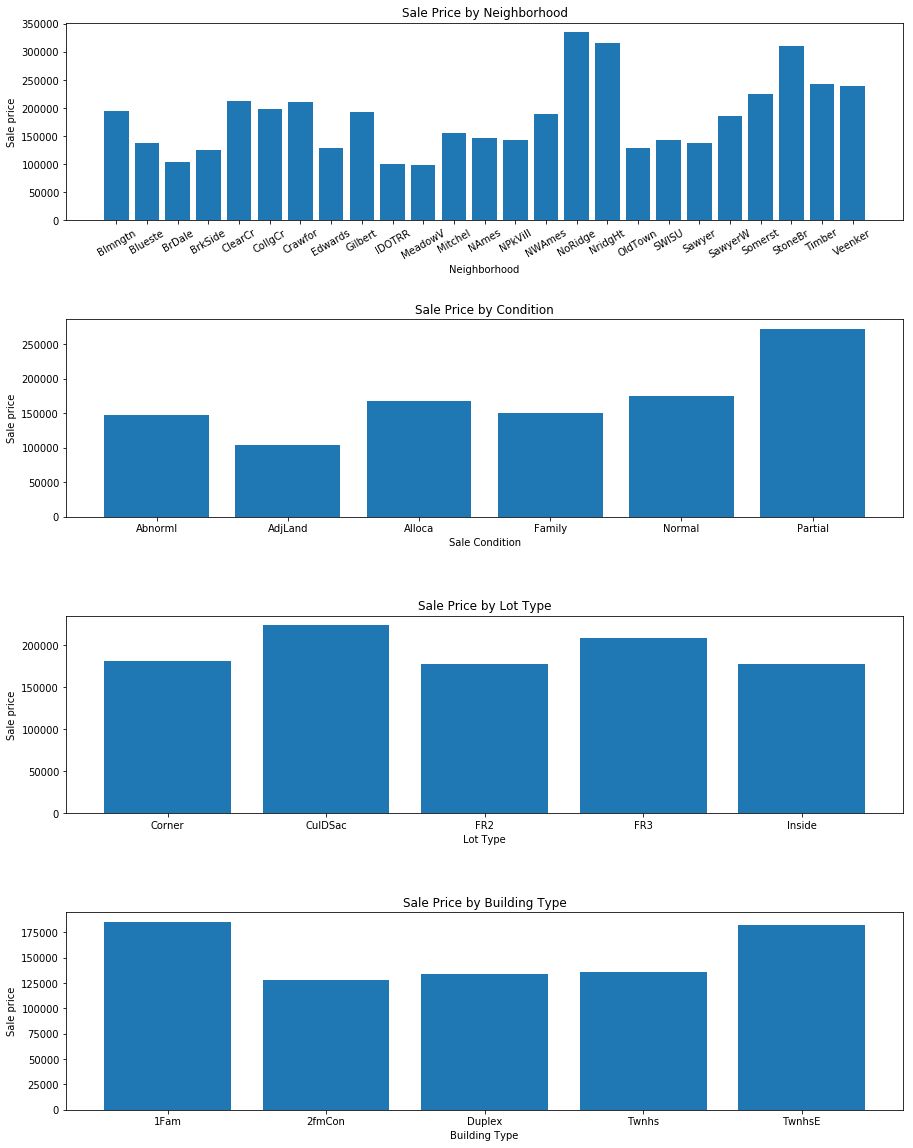

In [6]:
#plot 4 categorical variables that might have a strong relationship with sale price

plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=0.5)

plt.subplot(4, 1, 1)
plt.bar(hprices_df.groupby('neighborhood')['saleprice'].mean().index, hprices_df.groupby('neighborhood')['saleprice'].mean())
plt.title('Sale Price by Neighborhood')
plt.ylabel('Sale price')
plt.xlabel('Neighborhood')
plt.xticks(rotation=30)

plt.subplot(4,1,2)
plt.bar(hprices_df.groupby('salecondition')['saleprice'].mean().index, hprices_df.groupby('salecondition')['saleprice'].mean())
plt.title('Sale Price by Condition')
plt.ylabel('Sale price')
plt.xlabel('Sale Condition')

plt.subplot(4,1,3)
plt.bar(hprices_df.groupby('lotconfig')['saleprice'].mean().index, hprices_df.groupby('lotconfig')['saleprice'].mean())
plt.title('Sale Price by Lot Type')
plt.ylabel('Sale price')
plt.xlabel('Lot Type')

plt.subplot(4,1,4)
plt.bar(hprices_df.groupby('bldgtype')['saleprice'].mean().index, hprices_df.groupby('bldgtype')['saleprice'].mean())
plt.title('Sale Price by Building Type')
plt.ylabel('Sale price')
plt.xlabel('Building Type')

plt.show()

In [7]:
#lot type doesn't seem to have a relation to sale price, so
#dummy only building type, sale condition, and neighborhood
hprices_df['bldgtype'] = hprices_df['bldgtype'].apply(lambda x: 1 if x in ['1Fam', 'TwnhsE'] else 0)
hprices_df['salecondition'] = hprices_df['salecondition'].apply(lambda x: 1 if x == 'Partial' else 0)
hprices_df['neighborhood'] = hprices_df['neighborhood'].apply(lambda x: 1 if x in ['NoRidge', 'NridgHt', 'StoneBr'] else 0)



In [8]:
#regress with OLS using the 6 best features-- 3 continuous and 3 dummied categorical
from sklearn import linear_model

y = hprices_df['saleprice']
X = hprices_df[['bldgtype','salecondition', 'neighborhood', 'overallqual', 'yearbuilt', 'totalbsmtsf']]

lrm = linear_model.LinearRegression()

lrm.fit(X, y)

print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [1.42092829e+04 1.64193683e+04 5.79294417e+04 2.95536830e+04
 1.31234224e+02 3.86751505e+01]

Intercept: 
 -318992.753319807


In [10]:
import statsmodels.api as sm

#print and interpet results
X = sm.add_constant(X)

results = sm.OLS(y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     621.2
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        10:19:50   Log-Likelihood:                -17616.
No. Observations:                1460   AIC:                         3.525e+04
Df Residuals:                    1453   BIC:                         3.528e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -3.19e+05   8.76e+04     -3.643      0.000   -4.91e+05   -1.47e+05
bldgtype       1.421e+04   4005.194      3.548      0.000    6352.702    2.21e+04
salecondition  1.642e+04   4287.116      3.830      0.000    8009.770    2.48e+04
neighborhood   5.793e+04   4324.641     13.395      0.000    4.94e+04    6.64e+04
overallqual    2.955e+04   1138.533     25.958      0.000    2.73e+04    3.18e+04
yearbuilt       131.2342     45.840      2.863      0.004      41.314     221.154
totalbsmtsf      38.6752      3.056     12.655      0.000      32.680      44.670
==============================================================================
Omnibus:                      500.285   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9451.000
Skew:                           1.106   Prob(JB):                         0.00
Kurtosis:                      15.267   Cond. No.                     1.78e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

An R-squared of 0.72 is strong, but not as good as using only 'overallqual,' which has an R-squared of 0.79. 


Coefficients: 
 [1.4209e+04 1.6419e+04 5.7929e+04 2.9553e+04 1.3123e+02 3.8675e+01]

Intercept: 
 -318992.75331972155


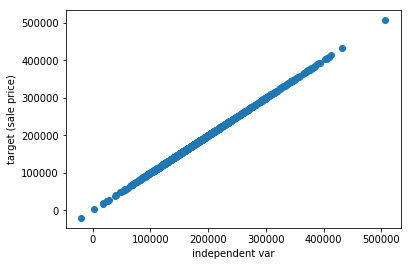

In [16]:
#Assumption one: linearity of the model in its coefficients

#equation: intercept + b1x1 + b2x2 + .... + b5x5 
hprices_df['y'] = -318992.753319807 + 14209*hprices_df['bldgtype'] + 16419*hprices_df['salecondition'] + 57929*hprices_df['neighborhood'] \
+ 29553*hprices_df['overallqual'] + 131.23*hprices_df['yearbuilt'] + 38.675*hprices_df['totalbsmtsf']

# fit a linear regression where target is y and features are the independent variables
lrm_example = linear_model.LinearRegression()
lrm_example.fit(hprices_df[['bldgtype','salecondition', 'neighborhood', 'overallqual', 'yearbuilt', 'totalbsmtsf']],hprices_df['y'])

# predictions of the linear regression
predictions = lrm_example.predict(hprices_df[['bldgtype','salecondition', 'neighborhood', 'overallqual', 'yearbuilt', 'totalbsmtsf']])

# we print the estimated coefficients
print('\nCoefficients: \n', lrm_example.coef_)
print('\nIntercept: \n', lrm_example.intercept_)

# we plot the estimated Y and X
plt.scatter(hprices_df['y'], predictions)
plt.xlabel('independent var')
plt.ylabel("target (sale price)")
plt.show()

In [18]:
#Assumption two: the error term should be zero on average

X = hprices_df[['bldgtype','salecondition', 'neighborhood', 'overallqual', 'yearbuilt', 'totalbsmtsf']]
predictions = lrm.predict(X)

errors = y - predictions

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: -2.1608597407602283e-11
